<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/PR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Práctica 3

##Introducción

Esta es la tercera práctica del tercer laboratorio. En esta práctica se clasifican imágenes. Las imáenes van a ser números escritos a mano y gracias a la clasificación.
Lo primero es cargar la base de datos con la que se va a trabajar, que es la de "load_digits" proporcionada por scikit-learn.

In [64]:
#Importamos las librerias necesarias
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
import math


from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Cargamos el dataset de la librería indicada.


Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

- Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

- Comprensión de los datos: recopilación inicial, descripción y exploración  de datos.

- Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

- Modelado: aplicar las técnicas de minería de datos a los dataset.

- Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

- Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action. 

##Comprensión de los negocios y definición del problema

El etiquetado de imágenes es una tarea ardua. Es por ello y también debido a sus aplicaciones prácticas que
los científicos llevan un tiempo intentando mejorar los métodos para clasificarlas automáticamente. En la
oficina de correos de Pozuelo de Alarcón quieren poner en práctica un modelo que clasifique las cartas según
el código postal escrito en ellas. Para ello vamos a crear un clasificador que leyendo un número escrito a mano
pueda saber cuál es. Dicho clasificador funcionará mediante un set de entrenamiento donde se buscará un
plano que divida las diferentes clases dispuesta en un espacio n-dimensional dependiendo de sus
características.

Para ello usaremos el dataset “load_digits” que se encuentra en scikit-learn. Elige el clasificador que más se
adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las
siguientes cuestiones.

1) Crea un clasificador que permita saber qué número es a partir de una imagen de este. Realiza al
menos dos configuraciones y dibuja una tabla donde se muestre la precisión con la que clasifican.


2) Elige 5 números que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas.
Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error ha
funcionado el clasificador. 


## Comprensión de los datos

El dataset que hemos descargado me devuelve un diccionario que contiene las siguientes claves:

- Data: una matriz de tamaño (nº muestras, nº características) que contiene las imágenes de los dígitos.
- Target: una matriz de tamaño (nº muestras), que contiene las etiquetas de los dígitos, es decir, los números que representan.
- Target_names: una matriz de tamaño (nº clases), que contiene los nombres de las etiquetas, es decir, los números que representan.
- Images: una matriz de tamaño (nº 
muestras, altura, anchura) que contiene las imágenes de los dígitos en forma de matriz.
- DESCR: una cadena de texto que describe el conjunto de datos.


##Preparación de los datos

Primero se inspeccionan un poco más los datos.

Se puede ver el tamaño del conjunto de datos, los nombres de las características, los valores de las características y los valores objetivo. 


In [65]:
print(digits.data.shape)
print(digits.feature_names)

(1797, 64)
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


Esto indica que hay 1797 imágenes y cada imagen está representada por un vector de 64 características.

Se ve si en el diccionario hay NaN

In [66]:
if any([any([val != val for val in row]) for row in digits.data]):
    print("Hay valores NaN en el conjunto de datos.")
else:
    print("No hay valores NaN en el conjunto de datos.")

No hay valores NaN en el conjunto de datos.


Ahora se sabe que en el diccionario no hay valores vacíos.

Como es una base de datos sacada de la propia librería de python podemos decir que es correcta y no hay outliers. Pero aún asi vamos a ver si es asi o no. Para ello cogemos todas las claves que contienen datos númericos y hacemos diagramas de cajas ya que es la mejor manera de visualizar los datos.

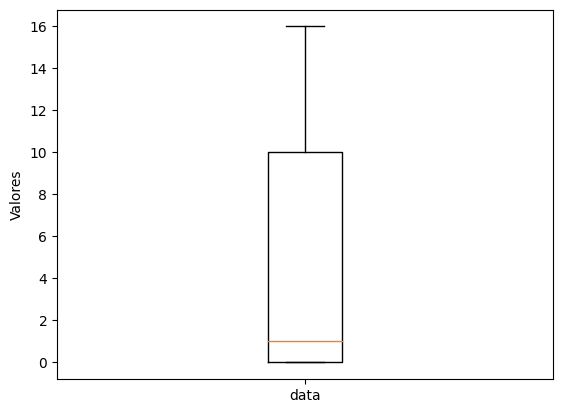

In [67]:
datos1 = digits['data']

fig, ax = plt.subplots()
ax.boxplot(datos1.flatten())
ax.set_xticklabels(['data'])
ax.set_ylabel('Valores')
plt.show()

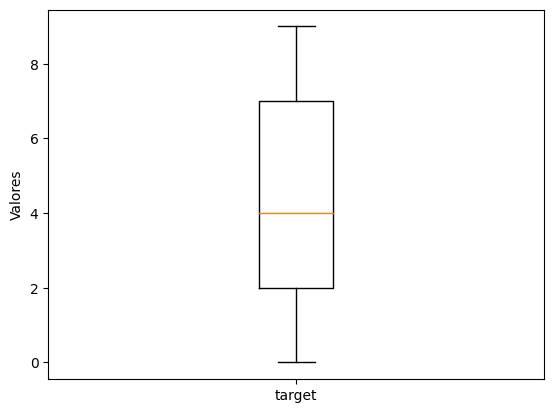

In [68]:
datos2 = digits['target']

fig, ax = plt.subplots()
ax.boxplot(datos2.flatten())
ax.set_xticklabels(['target'])
ax.set_ylabel('Valores')
plt.show()

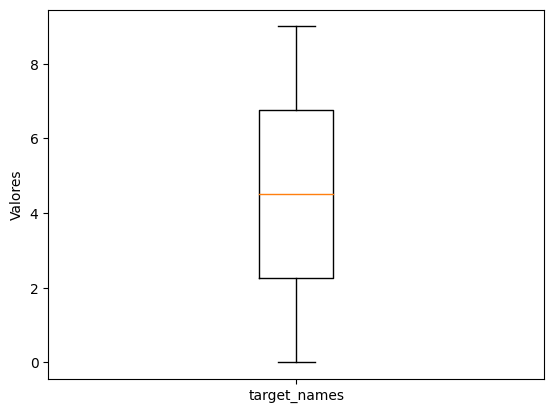

In [69]:
datos3 = digits['target_names']

fig, ax = plt.subplots()
ax.boxplot(datos3.flatten())
ax.set_xticklabels(['target_names'])
ax.set_ylabel('Valores')
plt.show()

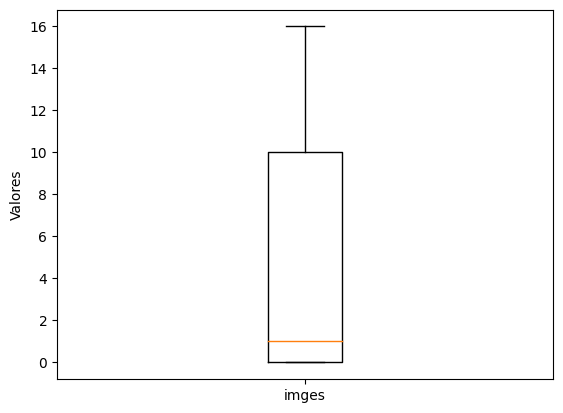

In [70]:
datos4 = digits['images']

fig, ax = plt.subplots()
ax.boxplot(datos4.flatten())
ax.set_xticklabels(['imges'])
ax.set_ylabel('Valores')
plt.show()

Se observa que ninguna de las claves del diccionario con el que se trabaja, no hay outliers en sus valores como se había pensado previamente. Debido a que es una base de datos proporcionada por la librería sklearn.

Por último en el anális de datos, se van a visualizar los datos para tener una mejor comprensión de los mismos. Por ejemplo, se pueden trazar algunos ejemplos de imágenes para ver cómo se ven las imágenes y cómo están etiquetadas. 

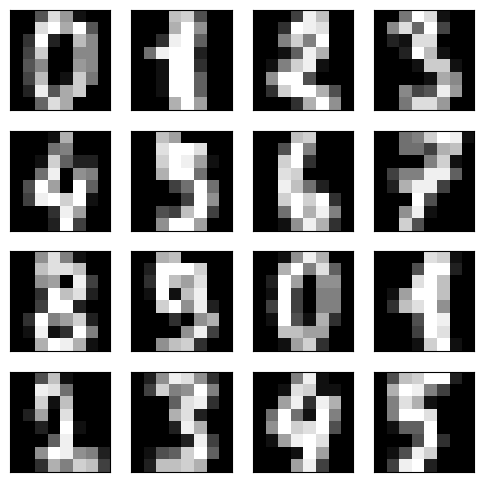

In [71]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.data[:16][i].reshape(8, 8), cmap='gray')
  ax.set(xticks=[], yticks=[])
plt.show()



Se observamos que estas imágenes, al igual es un poco confusa de reconocer, pero se diferencia perfectamente los números que se muestran (0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5) además se ve que las imágenes están en orden.

#Modelado

En este paso, es el momento se aplicar una técnica de Data Mining en este caso el enunciado nos pide que utilicemos la clasificación. El objetivo es clasificar números escritos a mano.

Al final cuando hay un número escrito a mano, deduces cual es a partir de similitudes con los tuyos y con los demás, por esto es un proceso de clasificación.

En este problema en concreto nos interesa clasificar por afinidad, es decir por las pequeñas diferencias que se ven. O en otras palabras por las imágenes más parecidas por lo que sabiendo esto, podemos decir que la mejor manera de clasificar las imágenes en por KNN (vecinos más cercanos), cuánto más se parezca las imágenes a uno de los objetivos, se clasificará por ese número.


Una vez elegida la técnica, se empieza el proceso, para ellos debemos dividir los datos en dos conjuntos, de entrenamiento (para entrenar el modelo elegido) y de validación (para validar el modelo).

In [72]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

En el enunciado en el segúndo punto, se pide que se eligan 5 números que no se hayan usado ni para entrenar el modelo, ni para evaluarlo y clasifícarlas.

Para ello se seben sacar 5 de las imágenes que forman el conjunto de entrenamiento para no entrenar el modelo con estas para que después se pueda comprobar.

In [73]:
indicesacomprobar =  np.random.randint(low=0, high=1437, size=5)
indicesacomprobar

array([ 691, 1340,  770,  124,  894])

Se forma el conjunto definitivo quitando las 5 imágenes que después se comprobará.

In [74]:
X_train = np.delete(X_train, indicesacomprobar, axis=0)
y_train = np.delete(y_train, indicesacomprobar, axis=0)

### 1) Crea un clasificador que permita saber qué número es a partir de una imagen de este. Realiza al menos dos configuraciones y dibuja una tabla donde se muestre la precisión con la que clasifican.



Como se ha justificado, se utiliza el clasificador KNN, siempre es más efectivo que la K sea impar ya que sino podrá dar lugar a empate, por eso probamos la configuración de k=3 y k=5. A continuación se entrenan los clasificadores.

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Probamos: K=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

#Probamos: K=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

KNeighborsClassifier()

Para saber que configuración es más efectiva se calcula la precisión de cada una.

In [80]:
from sklearn.metrics import accuracy_score

y_pred3 = knn3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)

y_pred5 = knn5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)

print("Precisión (K=3): {:.6f}".format(accuracy3))
print("Precisión (K=5): {:.6f}".format(accuracy5))

Precisión (K=3): 0.983333
Precisión (K=5): 0.986111


Observando la precisión de cada una de las configuraciones, a pesar de ser las dos muy altas y muy buenas, la configuración que usa los 5 vecinos más cercanos (k=5) tiene una precisión mayor por lo que nos quedamos con este clasificador y configuración.

In [77]:
import pickle

#Cargamos el modelo
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn5, f)

###2) Elige 5 números que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas. Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error hafuncionado el clasificador. 

Con las imágenes que se han extraido al principio son con las que se trabaja en este apartado.

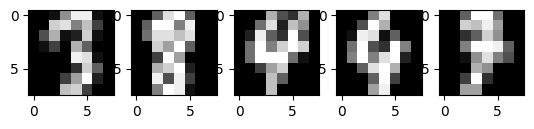

In [78]:
comprobar = digits.data[indicesacomprobar]

fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(comprobar[i].reshape(8, 8), cmap='gray')
plt.show()

Estas son lás imágenes que se habían reservado, ahora vamos a ver lo que predice nuestro modelo y lo que representas las imágenes reales con la clave target del diccionario que guarda el valor de cada imágen.

Por último se comprueba que todas las imágenes estén bien clasificadas.

In [79]:
prediccion = knn5.predict(comprobar)
print(prediccion)

real = digits['target'][indicesacomprobar]
print(real)

if (prediccion == real).all():
  print('La predicción se ha hecho correctamente')

[3 8 4 4 7]
[3 8 4 4 7]
La predicción se ha hecho correctamente


#Evaluación

En cuanto a la evaluación de este trabajo, podemos decir que es muy buen modelo, ya que se ha ejecutado el código una cantidad de veces muy alta y podemos decir que ninguna ha fallado en la predicción. Esto es debido a la precisión del modelo que es 0.986111, es muy cercano al uni por loq ue hay muy poca probabilidad de que clasifique mal.

#Despliegue

Este trabajo se ha hecho especificamente para ayudar a la oficina de correos en Pozuelo de Alarcón, para que una máquina lea el código postal de las cartas que llegan y se clasifiquen direcamente gracias a un clasificador como el que se acaba de crear. 

Esto es una ventaja a destacar, ya que de esta manera una persona no se tiene que dedicar unica y exclusivamente a leer números, entenderlos y clasificarlos, esta persona se podía dedicar igual a una tarea más interesante.